<a href="https://colab.research.google.com/github/MSVGH1/IAD/blob/main/%D0%9B%D0%A02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# завантажуємо потрібні бібліотеки

import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6

In [2]:
howpop_train_url = 'https://raw.githubusercontent.com/radiukpavlo/intelligent-data-analysis/main/02_assignments/ida_lab-02_visual_analysis/howpop_train.csv'

df = pd.read_csv(howpop_train_url)

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: стовпці 
        inplace = True) # позбавляє необхідності зберігати набір даних

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
# бінарні і категоріальні змінні
df.describe(include = ['object', 'bool']).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# налаштування зовнішнього вигляду графіків у seaborn

sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [10]:
df['year'] = df.published.apply(lambda ts: ts.year)
df['month'] = df.published.apply(lambda ts: ts.month)
df['day'] = df.published.apply(lambda ts: ts.day)
df['dayofweek'] = df.published.apply(lambda ts: ts.isoweekday())
df['hour'] = df.published.apply(lambda ts: ts.hour)

In [11]:
#Завдання 1
df['mon_yr'] = [str(p)[:7] for p in df.published]
print(df.mon_yr.value_counts())
mon = df.mon_yr.value_counts().index[0]
print(mon)

2015-03    2189
2016-03    2115
2015-07    2111
2015-04    2110
2015-12    2084
           ... 
2008-06     599
2008-04     597
2008-03     545
2008-02     496
2008-01     435
Name: mon_yr, Length: 106, dtype: int64
2015-03


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


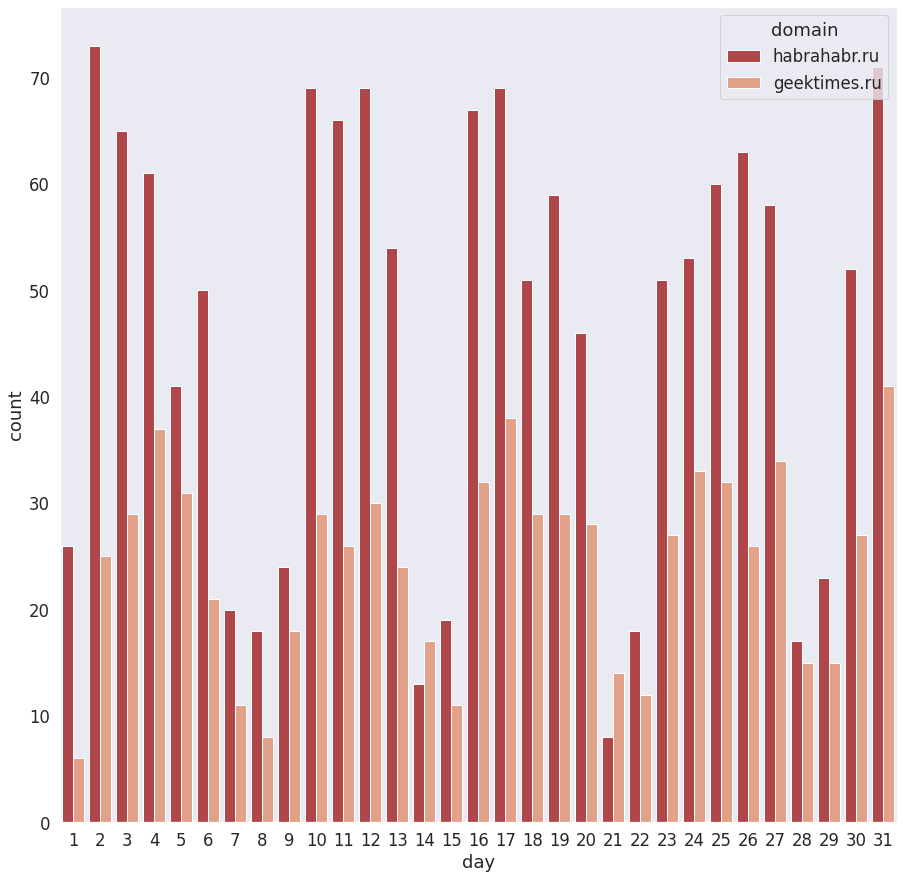

In [15]:
#Завдання 2
df_mon = df[df.mon_yr == mon]
df_mon['day'] = [p.day for p in df_mon.published]

fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,1,1)
sns.countplot(x = 'day', hue = 'domain', data = df_mon);

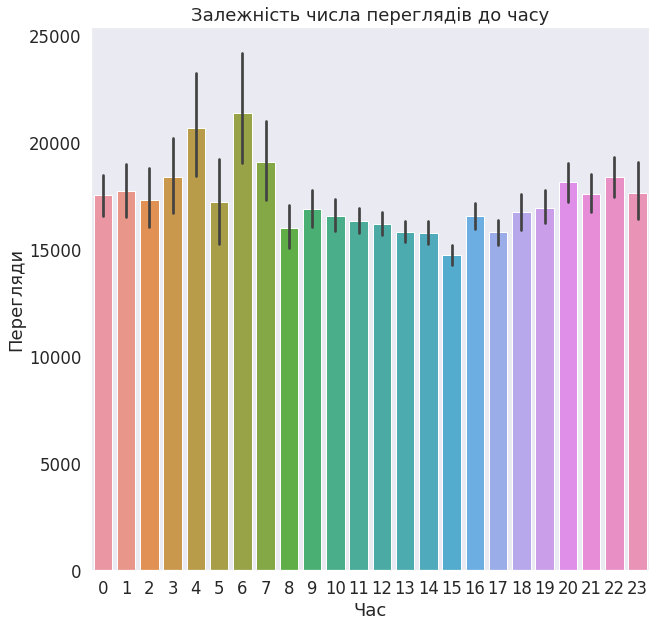

In [18]:
#Завдання 3
plt.subplots(figsize=(10,10))

ax = sns.barplot(data=df,
              x='hour',
              y='views')

ax.set(xlabel='Час',ylabel='Перегляди', title = 'Залежність числа переглядів до часу')

plt.show()


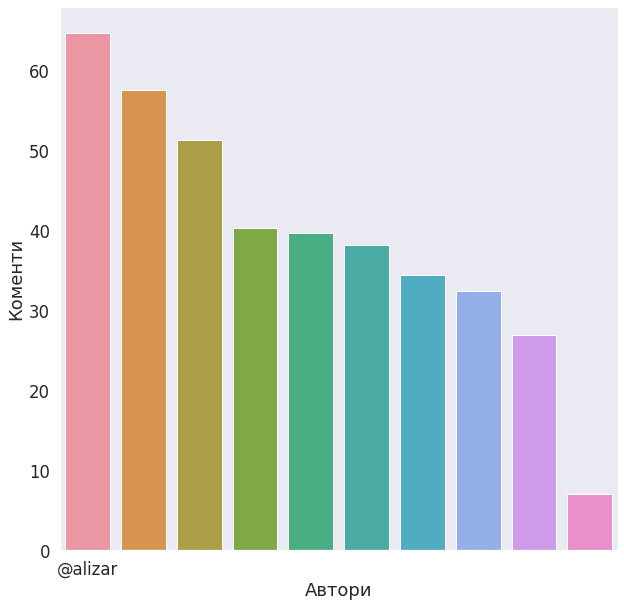

In [23]:
#Завдання 4
newdata = df
newdata['counter'] = 1

topset = newdata.groupby('author').counter.count().reset_index().sort_values(by=['counter'], ascending=False)
top_10 = topset.head(10)

minset = newdata.groupby('author').comments.sum().reset_index().sort_values(by=['comments'], ascending=False)

outcome = pd.merge(
top_10,
minset,
how='left').sort_values(by=['counter'], ascending=False)

outcome['frequency'] = outcome.comments / outcome.counter

outcome.sort_values(by=['frequency'], ascending=False).head(1000)

#графік

plt.subplots(figsize=(10,10))

outcome = outcome.sort_values(by=['frequency'], ascending=False)

ax = sns.barplot(data=outcome,
x='author',
y='frequency')

ax.set(xticks=range(len(top_10.index)) ,  xticklabels=outcome.author.head(1),xlabel='Автори',ylabel='Коменти')

plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


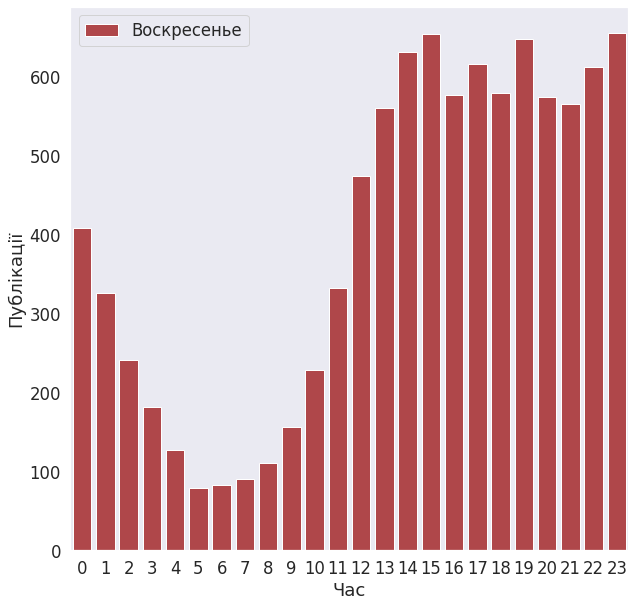

In [32]:
#Завдання 5
newdata = df[ (df.dayofweek == 7)]

newdata['counter'] = 1

dayofweekset = newdata.groupby(['dayofweek','hour']).counter.sum().reset_index()

plt.subplots(figsize=(10,10))

ax = sns.barplot(data=dayofweekset,
x='hour',
y='counter',
hue='dayofweek' )

ax.set(   xlabel='Час',ylabel='Публікації')


leg = ax.get_legend()
leg.set_title('')
new_labels = ['Воскресенье']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
